# Simple Linear Regression

## Data Pre-processing

In [41]:
#1. Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Importing the dataset
df = pd.read_csv('Data/Salary_Data.csv')
print("The dataset preview:\n")
print(df.head())

#3. Missing data
#Step 3.1.1: Is there any missing data?
df.info()
# Method 3.1.2: print number of null valyes
missing_values = df.isnull().sum()
print(missing_values)

# Step 3.2: Fill the missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 1:3])            # Apply on all numerical columns
df.iloc[:, 1:3] = imputer.transform(df.iloc[:, 1:3])            # Replace


#4. Encoding Categorical and Binary data
# Step 4.1: 自动识别binary columns和categorical columns
binary_columns = []
categorical_columns = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        if df[col].nunique() == 2:
            binary_columns.append(col)
        elif df[col].nunique() > 2:
            categorical_columns.append(col)

print("Binary Columns:", binary_columns)
print("Categorical Columns:", categorical_columns)


# Step 4.2: categorical columns - One-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

df_encoded = pd.DataFrame(ct.fit_transform(df))

# Step 4.3: Binary columns - Binary columns: Label encoding, 仅适用于单列binary的情况
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded.iloc[:, -1] = le.fit_transform(df_encoded.iloc[:, -1])

# # Step 4.3: Binary columns - Binary columns: Binary columns: Ordinal Encoder, 可用在多列binary columns的情况
# from sklearn.preprocessing import OrdinalEncoder
# 
# ct = ColumnTransformer(
#     transformers=[('ordinal_encoder', OrdinalEncoder(), binary_columns)],
#     remainder='passthrough'
# )
# 
# # 将 DataFrame 转换为 NumPy 数组并进行编码
# df_encoded = np.array(ct.fit_transform(df_encoded))

print("The encoded dataset preview:\n")
print(df_encoded)


#5. X and y values
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

#6. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#7. Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3:] = sc.transform(X_test[:, 3:])
# print(X_train)
# print(X_test)

The dataset preview:

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
YearsExperience    0
Salary             0
dtype: int64
Binary Columns: []
Categorical Columns: []
The encoded dataset preview:

       0     1
0    1.1   1.0
1    1.3   4.0
2    1.5   0.0
3    2.0   3.0
4    2.2   2.0
5    2.9   7.0
6    3.0  11.0
7    3.2   5.0
8    3.2  14.0
9    3.7  10.0
10   3.9  13.0
11   4.0   6.0
12   4.0   8.0
13   4.1   9.0
14   4.5  12.0
15   4.9  16.0
16   5.1  15.0
17   5.3  18.0
18   5.9  17.0
19   6.0  20.0
20   6.8  19.0
21   7.1  21.0
22   7

## Training the Simple Linear Regression model on the Training set

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [29]:
y_pred_test = regressor.predict(X_test)

## Visualising the Training set results

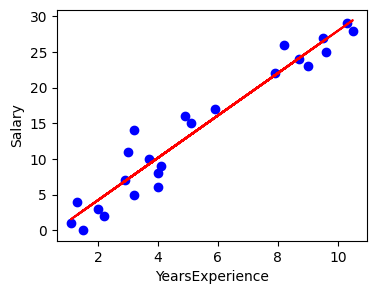

In [30]:
plt.figure(figsize=(4,3))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

## Visualising the Test set results

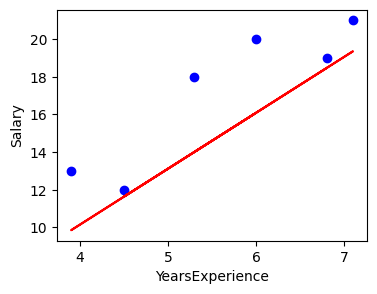

In [31]:
plt.figure(figsize=(4,3))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

## Making a single prediction (for example the salary of an employee with 12 years of experience)

### Note:
Linear Regression取的是二维数组。

In [32]:
y_pred_single = regressor.predict([[12]])

In [33]:
y_pred_single

array([33.89712759])

## Getting the final linear regression equation with the values of the coefficients

In [34]:
print(regressor.intercept_)

-1.7278585138469928


In [35]:
print(regressor.coef_)

[2.96874884]
